In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt

In [3]:
samples = np.array(['너 오늘 이뻐 보인다',
          '나는 오늘 기분이 더러워',
          '끝내주는데, 좋은 일이 있나봐',
          '나 좋은 일이 생겼어',
          '아 오늘 진짜 짜증나',
          '환상적인데, 정말 좋은거 같아'])

targets =np.array([[1], [0], [1], [1], [0], [1]])

print(samples)
print(targets)

['너 오늘 이뻐 보인다' '나는 오늘 기분이 더러워' '끝내주는데, 좋은 일이 있나봐' '나 좋은 일이 생겼어'
 '아 오늘 진짜 짜증나' '환상적인데, 정말 좋은거 같아']
[[1]
 [0]
 [1]
 [1]
 [0]
 [1]]


In [4]:
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)

print(tokenizer.word_counts)
print(tokenizer.word_index)

OrderedDict([('너', 1), ('오늘', 3), ('이뻐', 1), ('보인다', 1), ('나는', 1), ('기분이', 1), ('더러워', 1), ('끝내주는데', 1), ('좋은', 2), ('일이', 2), ('있나봐', 1), ('나', 1), ('생겼어', 1), ('아', 1), ('진짜', 1), ('짜증나', 1), ('환상적인데', 1), ('정말', 1), ('좋은거', 1), ('같아', 1)])
{'오늘': 1, '좋은': 2, '일이': 3, '너': 4, '이뻐': 5, '보인다': 6, '나는': 7, '기분이': 8, '더러워': 9, '끝내주는데': 10, '있나봐': 11, '나': 12, '생겼어': 13, '아': 14, '진짜': 15, '짜증나': 16, '환상적인데': 17, '정말': 18, '좋은거': 19, '같아': 20}


In [5]:
sequence = tokenizer.texts_to_sequences(samples)
print(sequence)

[[4, 1, 5, 6], [7, 1, 8, 9], [10, 2, 3, 11], [12, 2, 3, 13], [14, 1, 15, 16], [17, 18, 19, 20]]


In [7]:
input_sequence = np.array(sequence)
print(input_sequence)

[[ 4  1  5  6]
 [ 7  1  8  9]
 [10  2  3 11]
 [12  2  3 13]
 [14  1 15 16]
 [17 18 19 20]]


In [18]:
## 감성분석
batch_size = 2
num_epochs = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
emb_size = 128
hidden1 = 256
hidden2 = 1

# sentiment_model = keras.Sequential()
# sentiment_model.add(keras.Input(4, ))
# sentiment_model.add(keras.layers.Embedding(vocab_size, emb_size))
# sentiment_model.add(keras.layers.Lambda(lambda x: tf.reduce_mean(x, axis=1)))
# sentiment_model.add(keras.layers.Dense(hidden1, 'relu'))
# sentiment_model.add(keras.layers.Dense(hidden2, 'sigmoid'))
inputs = keras.Input(shape=(4, ))
embedding_layer = keras.layers.Embedding(vocab_size, emb_size)(inputs)
mean_emb = tf.reduce_mean(embedding_layer,axis= 1)
dense1 = keras.layers.Dense(hidden1, 'relu')(mean_emb)
outputs = keras.layers.Dense(hidden2, 'sigmoid')(dense1)

sentiment_model_func = keras.Model(inputs = inputs, outputs = outputs)

sentiment_model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding_1 (Embedding)     (None, 4, 128)            2688      
                                                                 
 tf.math.reduce_mean (TFOpLa  (None, 128)              0         
 mbda)                                                           
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,969
Trainable params: 35,969
Non-trainable params: 0
_________________________________________________________

In [15]:
sentiment_model.compile(loss = 'binary_crossentropy',
                        optimizer= 'adam',
                        metrics=['acc'])

history = sentiment_model.fit(input_sequence,targets,epochs = num_epochs, batch_size= batch_size)

Epoch 1/100
3/3 [==============================] - 1s 3ms/step - loss: 0.1917 - acc: 0.8333
Epoch 2/100
3/3 [==============================] - 0s 2ms/step - loss: 0.1414 - acc: 1.0000
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0815 - acc: 1.0000
Epoch 4/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0573 - acc: 1.0000
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0339 - acc: 1.0000
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0266 - acc: 1.0000
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 0.0191 - acc: 1.0000
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0140 - acc: 1.0000
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0110 - acc: 1.0000
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 0.0092 - acc: 1.0000
Epoch 11/100
3/3 [==============================] - 0s 4ms/step - loss: 0.0079 

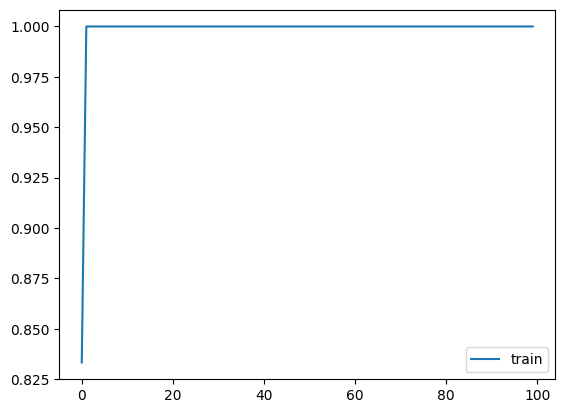

In [17]:
# plt.plot(history.history['val_acc'], label = 'validation')
plt.plot(history.history['acc'], label = 'train')
plt.legend()
plt.show()

In [22]:
class SentimentSubclassingModel(keras.Model):
    def __init__(self, vocab_size, emb_size, hidden, outputs_node):
        super(SentimentSubclassingModel, self).__init__()
        self.hidden1 = keras.layers.Dense(hidden, 'relu')
        self.emb_layer = keras.layers.Embedding(vocab_size, emb_size)
        self.outputs = keras.layers.Dense(outputs_node, 'sigmoid')
        
    def call(self, inputs):
        x = self.emb_layer(inputs)
        x = tf.reduce_mean(x, axis = 1)
        x = self.hidden1(x)
        x = self.outputs(x)
        
        return x
    
my_model = SentimentSubclassingModel(vocab_size, emb_size, hidden1, hidden2)

In [5]:
import sklearn
from sklearn import datasets

sklearn.__version__

'1.2.2'

In [7]:
iris_dataset = datasets.load_iris()
print(type(iris_dataset))

<class 'sklearn.utils._bunch.Bunch'>


In [11]:
print(iris_dataset['data'])
print(iris_dataset['target'])
print(iris_dataset['target_names'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [12]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [13]:
import pandas as pd

In [14]:
iris = pd.DataFrame(iris_dataset['data'])
iris['target'] = iris_dataset['target']
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


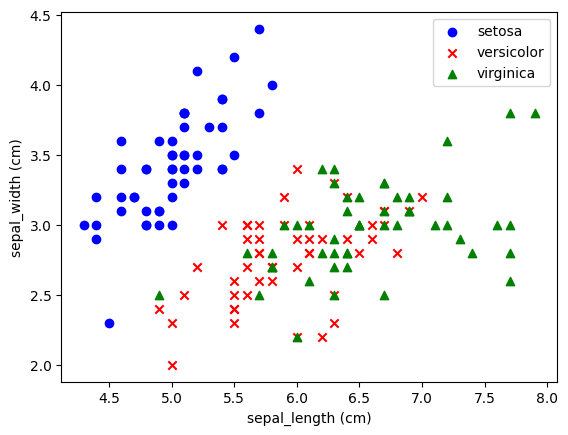

In [15]:
setosa = iris[iris['class'] == 0]
versicolor = iris[iris['class'] == 1]
virginica = iris[iris['class'] == 2]

plt.scatter(setosa['sepal_length'], setosa['sepal_width'], marker='o', color = 'b', label = 'setosa')
plt.scatter(versicolor['sepal_length'], versicolor['sepal_width'], marker='x', color = 'r', label = 'versicolor')
plt.scatter(virginica['sepal_length'], virginica['sepal_width'], marker='^', color = 'g', label = 'virginica')

plt.legend()
plt.xlabel('sepal_length (cm)')
plt.ylabel('sepal_width (cm)')
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [17]:
train_input, test_input, train_target, test_target = train_test_split(iris_dataset['data'], iris_dataset['target'],
                                                                      test_size=0.2)

print(train_input.shape)
print(type(train_input), type(train_target))

(120, 4)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [18]:
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

In [20]:
knn = KNeighborsClassifier(n_neighbors=5)

In [21]:
params_knn = {'n_neighbors':range(1,10)}
gs_knn = GridSearchCV(estimator= knn,
                      param_grid= params_knn,
                      scoring='accuracy', cv= 5, verbose = 1)

gs_knn.fit(train_scaled, train_target)

print(gs_knn.best_params_)
print(gs_knn.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'n_neighbors': 7}
0.9666666666666666
